# Lab 3 # comparing models and scaling effect

Group members:
- Name (ID): Sai Sahas Elluru (0753808)
- Name (ID): Hari Sai Palem (0747511)
- Name (ID): Siddharth Singh (0756590)

In this lab, the main objective is to understand the different models and compare their capabilities, we also look at scaling and how applying it helps in certain machine learning models.

By the end of this lab you should have:

- gained experience with building different models and ploting the results.
- a better understanding of scaling and how it affects different models. 

### Grading

This lab will be graded as follows:
- 50% for comments/text
    - Half of the lab grade will come from an assessment of the comments/text included in your Jupyter notebook submission
        - The comments/text should explain clearly what you are doing and why it's necessary to achieve the objective
        - You should think of the comments/text as if you were creating a tutorial/blog to guide someone through your work 
- 50% for code
    - Half of the lab grade will come from an assessment of your code
        - The code in the notebook should use base python, NumPy, Pandas, sklearn, and/or matplotlib. 
        - All code cells should run error free
        - The code does not have to be optimized or pretty: it needs to be functional for the specific task

### Submition

This is a **group submission** lab, so work in the same groups that you are already assigned to.

You should submit the following:
- a well-commented Jupyter notebook
- the original dataset used as a .csv file

### Instructions
Find a publicly available dataset and load it using Pandas:

The dataset should include at least 1,000 rows, 4 different features where one of these features is a categorical feature, and a binary class.

Make sure to explain your findings at each step, especially steps (1,8 and 9).

Use your last 3 digits from your user ID as a random state variable where applicable and do implement the following:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1- By observing the data and without building a classification model, find out if the data requires scaling or not, and explain how you came to your conclusion and confirm this with a plot of the data.

In [5]:
data = pd.read_csv('baseball.csv')

In [6]:
data = data[['League','RS','RA','W','OBP','SLG','BA','Playoffs']]

In [7]:
data.head()

,League,RS,RA,W,OBP,SLG,BA,Playoffs
0,NL,734,688,81,0.328,0.418,0.259,0
1,NL,700,600,94,0.320,0.389,0.247,1
2,AL,712,705,93,0.311,0.417,0.247,1
3,AL,734,806,69,0.315,0.415,0.260,0
4,NL,613,759,61,0.302,0.378,0.240,0


- The dataset represents the statiscs of base ball by Bean and DePodesta. It is the famous moneyball dataset.
- The variables in the data set are:
- League - This variable represents the league name.
- Runs Scored (RS) - The 'Runs Scored' displays the number of runs they scored during that league. 
- Runs Allowed (RA) - The 'Runs Allowed' variable gives the information of how many runs did they give
- Wins (W) - This variable gives the number of Won matches information.
- On-Base Percentage (OBP) - The On-Base Percentage  refers to how frequently a batter reaches base per plate appearance. Times on base include hits, walks and hit-by-pitches,but do not include errors, times reached on a fielder's choice or a dropped third strike
- Slugging Percentage (SLG) - The Slugging percentage represents the total number of bases a player records per at-bat.
- Batting Average (BA) - In baseball, the batting average (BA) is defined by the number of hits divided by at bats. This variable gives batting average information of that particular batsmen.
- Playoffs (binary) - The Playoffs mean the finals of a sports league. This variable gives the information that they qulaified to finals or not on that particualr league.

In [8]:
data = data.dropna()
data = data[0:1000]
data.shape

(1000, 8)

Scalingis done when there is huge magnitude difference between features. In our dataset by looking the head we can say that scaling has to be done because the magnitudes of RS, RA when compared to SLG, OBP are very high.

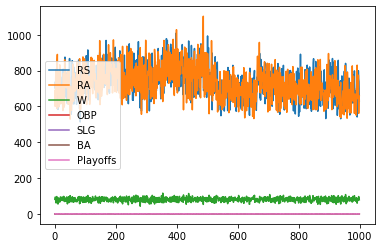

In [9]:
data.plot.line()
plt.show()

The above plot gives visual representation of distribution of featurees. It is clearly visible that the magnitudes of the features of the dataset are not comparable. So we are going to do scaling for the numerical features.

2- Apply the MinMaxScaler on the data and save it into a scaled version of the data.

In [10]:
numerical_feature = [feature for feature in data.columns if data[feature].dtypes!='O']
numerical_feature

['RS', 'RA', 'W', 'OBP', 'SLG', 'BA', 'Playoffs']

This feature method is used to seperate the numerical features from Objects. Now the variable numerical_feature has only features which has data types other than object.

In [11]:
Scaling = data[numerical_feature]
Scaling = Scaling.drop('Playoffs', axis = 1)
Scaling

,RS,RA,W,OBP,SLG,BA
0,734,688,81,0.328,0.418,0.259
1,700,600,94,0.320,0.389,0.247
2,712,705,93,0.311,0.417,0.247
3,734,806,69,0.315,0.415,0.260
4,613,759,61,0.302,0.378,0.240
...,...,...,...,...,...,...
995,690,698,83,0.336,0.377,0.272
996,799,774,76,0.339,0.427,0.266
997,754,561,97,0.345,0.389,0.266
998,738,647,89,0.338,0.401,0.267


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Scaled_data = scaler.fit(Scaling)
Scaled_data = scaler.transform(Scaling)
Scaled_data = pd.DataFrame(Scaled_data)
Scaled_data.columns = ['RS', 'RA', 'W', 'OBP', 'SLG', 'BA']

In [13]:
Scaled = pd.concat([Scaled_data,data[['League','Playoffs']]],axis=1)
Scaled.head()

,RS,RA,W,OBP,SLG,BA,League,Playoffs
0,0.445565,0.277003,0.520548,0.451220,0.578035,0.461538,NL,0
1,0.377016,0.123693,0.698630,0.353659,0.410405,0.276923,NL,1
2,0.401210,0.306620,0.684932,0.243902,0.572254,0.276923,AL,1
3,0.445565,0.482578,0.356164,0.292683,0.560694,0.476923,AL,0
4,0.201613,0.400697,0.246575,0.134146,0.346821,0.169231,NL,0


By using MinMaxScaler from sklearn we scaled the numerical features which result into values between 0 and 1. Before scaling we removed our target variable playoffs which is binary. Finally using concat we joined all columns into new variable scaled.

In [14]:
dummies = pd.get_dummies(Scaled['League'],drop_first= True)

In [15]:
Scaled_new = pd.concat([Scaled,dummies],axis=1)
Scaled_new.drop('League',axis=1,inplace=True)
Scaled_new

,RS,RA,W,OBP,SLG,BA,Playoffs,NL
0,0.445565,0.277003,0.520548,0.451220,0.578035,0.461538,0,1
1,0.377016,0.123693,0.698630,0.353659,0.410405,0.276923,1,1
2,0.401210,0.306620,0.684932,0.243902,0.572254,0.276923,1,0
3,0.445565,0.482578,0.356164,0.292683,0.560694,0.476923,0,0
4,0.201613,0.400697,0.246575,0.134146,0.346821,0.169231,0,1
...,...,...,...,...,...,...,...,...
995,0.356855,0.294425,0.547945,0.548780,0.341040,0.661538,0,0
996,0.576613,0.426829,0.452055,0.585366,0.630058,0.569231,0,1
997,0.485887,0.055749,0.739726,0.658537,0.410405,0.569231,1,0
998,0.453629,0.205575,0.630137,0.573171,0.479769,0.584615,0,0


Using another pandas tool dummies, we converted League which has values NL and AL into 1 and 0. Then we concated the columns to get the full dataframe. Now we have got the scaled dataframe.

3- Split the data into 5% testing and 95% training data.



In [16]:
data = data.drop('League',axis=1)
data = pd.concat([data,dummies],axis=1)
data

,RS,RA,W,OBP,SLG,BA,Playoffs,NL
0,734,688,81,0.328,0.418,0.259,0,1
1,700,600,94,0.320,0.389,0.247,1,1
2,712,705,93,0.311,0.417,0.247,1,0
3,734,806,69,0.315,0.415,0.260,0,0
4,613,759,61,0.302,0.378,0.240,0,1
...,...,...,...,...,...,...,...,...
995,690,698,83,0.336,0.377,0.272,0,0
996,799,774,76,0.339,0.427,0.266,0,1
997,754,561,97,0.345,0.389,0.266,1,0
998,738,647,89,0.338,0.401,0.267,0,0


We have converted values in League from NL & AL to 1 & 0 for the original data as well. This is done using the same pandas tool get_dummies.

In [17]:
X = data.drop('Playoffs',axis=1)
Y = data.Playoffs.values
x = Scaled_new.drop('Playoffs',axis=1)
y = Scaled_new.Playoffs.values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state= 590)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=590)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
X.columns
Y.columns

(950, 7)
(50, 7)
(950,)
(50,)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

We have seperated the feature variables and target variables into (X(original),x(scaled)) and (Y(original),y(scaled)) respectively. Then by using train test split we have split the data in 5% testing and 95% training

4- Build a classification model for the original data and the scaled data using the following methods:
 - Decision trees with no parameters.
 - Linear perceptron.
 - Linear SVM.



In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron

In [56]:
DT = DecisionTreeClassifier()
Original_DT = DT.fit(X_train,Y_train)
Scaled_DT = DT.fit(x_train,y_train)

In [57]:
SVC = LinearSVC()
Original_SVC = SVC.fit(X_train,Y_train)
Scaled_SVC = SVC.fit(x_train,y_train)

C:\Users\saisa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [58]:
Per = Perceptron()
Original_per = Per.fit(X_train,Y_train)
Scaled_per = Per.fit(x_train,y_train)

Here, we have created Decision Tree Classifier, Support Vector Classifier, and Perceptron models for both Original and scaled datasets. We have gone with the default parameters for models.

5- For the original data-set: calculate the accuracy of the testing and training data for each model, plot the accuracy of the three models using a single plot.



### Decision Trees Test Accuracy Score For Original Data

In [59]:
from sklearn.metrics import accuracy_score
Original_DT = DT.fit(X_train,Y_train)
Ypred = DT.predict(X_test)
DT_Original_Test_accuracy = accuracy_score(Y_test,Ypred)
DT_Original_Test_accuracy

0.78

### DT Train Accuracy For Original DAta

In [60]:
Y_pred2 = DT.predict(X_train)
DT_Original_Train_accuracy = accuracy_score(Y_train,Y_pred2)
DT_Original_Train_accuracy

1.0

### SVC Test Accuracy For Original DAta

In [61]:
Original_SVC = SVC.fit(X_train,Y_train)
Y_pred = SVC.predict(X_test)

C:\Users\saisa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [62]:
SVC_Original_Test_accuracy = accuracy_score(Y_test,Y_pred)
SVC_Original_Test_accuracy

0.68

### SVC Train Accuracy For Original DAta

In [63]:
Y_pred_2 = SVC.predict(X_train)
SVC_Original_Train_accuracy = accuracy_score(Y_train,Y_pred_2)
SVC_Original_Train_accuracy

0.7673684210526316

### Perceptron Test Accuracy For Original DAta

In [64]:
Original_per = Per.fit(X_train,Y_train)
Y_pred = Per.predict(X_test)
Per_Original_Test_accuracy = accuracy_score(Y_test,Y_pred)
Per_Original_Test_accuracy

0.76

### Perceptron Train Accuracy for Original Data

In [65]:
Y_pred_2 = Per.predict(X_train)
Per_Original_Train_accuracy = accuracy_score(Y_train,Y_pred_2)
Per_Original_Train_accuracy

0.8368421052631579

Using accuracy score metric from sklearn we have calculated training and testing accuracy for original dataset for all the three models.

In [67]:
plot = {'models' : ['DT_Original', 'SVC_Original', 'Per_Original'], 
          'Test_acc' : [DT_Original_Test_accuracy, SVC_Original_Test_accuracy, Per_Original_Test_accuracy],
         'Train_acc' : [DT_Original_Train_accuracy, SVC_Original_Train_accuracy, Per_Original_Train_accuracy]}

In [68]:
plot_df = pd.DataFrame(plot)
plot_df

,models,Test_acc,Train_acc
0,DT_Original,0.78,1.000000
1,SVC_Original,0.68,0.767368
2,Per_Original,0.76,0.836842


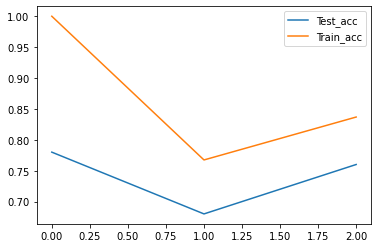

In [69]:
plot_df.plot.line()

6- For the scaled data-sets: calculate the accuracy of the testing data for each model, plot the accuracy of the three models using a single plot.



### Decision Trees Test Accuracy for Scaled Data

In [70]:
Scaled_DT = DT.fit(x_train,y_train)

In [71]:
y_pred = DT.predict(x_test)

In [72]:
DT_Scaled_Test_accuracy = accuracy_score(y_test,y_pred)
DT_Scaled_Test_accuracy

0.74

### DT Train Accuracy for Scaled Data

In [73]:
y_pred_2 = DT.predict(x_train)
DT_Scaled_Train_accuracy = accuracy_score(y_train,y_pred_2)
DT_Scaled_Train_accuracy

1.0

### SVC Test Accuracy for Scaled Data

In [74]:
Scaled_SVC = SVC.fit(x_train,y_train)
y_pred = SVC.predict(x_test)
SVC_Scaled_Test_accuracy = accuracy_score(y_test,y_pred)
SVC_Scaled_Test_accuracy

0.82

### SVC Train Accuracy for Scaled Data

In [75]:
y_pred_2 = SVC.predict(x_train)
SVC_Scaled_Train_accuracy = accuracy_score(y_train,y_pred_2)
SVC_Scaled_Train_accuracy

0.9136842105263158

### Perceptron Test Accuracy for Scaled Data

In [76]:
Scaled_per = Per.fit(x_train,y_train)
y_pred = Per.predict(x_test)
Per_Scaled_Test_accuracy = accuracy_score(y_test,y_pred)
Per_Scaled_Test_accuracy

0.86

### Perceptron Train Accuracy for Scaled Data

In [77]:
y_pred_2 = Per.predict(x_train)
Per_Scaled_Train_accuracy = accuracy_score(y_train,y_pred_2)
Per_Scaled_Train_accuracy

0.8726315789473684

Using accuracy score metric from sklearn we have calculated training and testing accuracy for scaled dataset for all the three models.

In [78]:
plot_2 = {'models' : ['DT_Scaled', 'SVC_Scaled', 'Per_Scaled'], 
          'Test_acc' : [DT_Scaled_Test_accuracy, SVC_Scaled_Test_accuracy, Per_Scaled_Test_accuracy],
         'Train_acc' : [DT_Scaled_Train_accuracy, SVC_Scaled_Train_accuracy, Per_Scaled_Train_accuracy]}

In [79]:
plot_2_df = pd.DataFrame(plot_2)

In [80]:
plot_2_df

,models,Test_acc,Train_acc
0,DT_Scaled,0.74,1.000000
1,SVC_Scaled,0.82,0.913684
2,Per_Scaled,0.86,0.872632


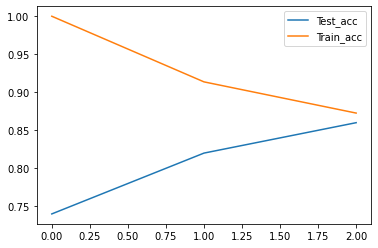

In [81]:
plot_2_df.plot.line()

7- Repeat steps 3 to 6 but this time increase the testing split size by 5% and decreasing the split size of the training data by 5%, do this until the testing size becomes 20% and the training size becomes 80%.


In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state= 590)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=590)

using train test split we have split the data in 10% testing and 90% training

### Decision Trees Test Accuracy for Original Data

In [83]:
Original_DT = DT.fit(X_train,Y_train)
Y_pred = DT.predict(X_test)
DT_Original_Test_Accuracy = accuracy_score(Y_test,Y_pred)
DT_Original_Test_Accuracy

0.81

### Decision Trees Train Accuracy for Original Data

In [84]:
Y_pred_2 = DT.predict(X_train)
DT_Original_Train_Accuracy = accuracy_score(Y_train,Y_pred_2)
DT_Original_Train_Accuracy

1.0

### SVC Test Accuracy for Original Data

In [87]:
Original_SVC = SVC.fit(X_train,Y_train)
Y_pred = SVC.predict(X_test)
SVC_Original_Test_Accuracy = accuracy_score(Y_test,Y_pred)
SVC_Original_Test_Accuracy

C:\Users\saisa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.75

### SVC Train Accuracy for Original Data

In [88]:
Y_pred_2 = SVC.predict(X_train)
SVC_Original_Train_Accuracy = accuracy_score(Y_train,Y_pred_2)
SVC_Original_Train_Accuracy

0.83

### Perceptron Test Accuracy for Original Data

In [89]:
Original_per = Per.fit(X_train,Y_train)
Y_pred = Per.predict(X_test)
Per_Original_Test_Accuracy = accuracy_score(Y_test,Y_pred)
Per_Original_Test_Accuracy

0.83

### Perceptron Train Accuracy for Original Data

In [90]:
Y_pred_2 = Per.predict(X_train)
Per_Original_Train_Accuracy = accuracy_score(Y_train,Y_pred_2)
Per_Original_Train_Accuracy

0.8788888888888889

Using accuracy score metric from sklearn we have calculated training and testing accuracy for original dataset for all the three models.

In [93]:
plot_3 = {'models' : ['DT_Original', 'SVC_Original', 'Per_Original'], 
          'Test_acc' : [DT_Original_Test_Accuracy, SVC_Original_Test_Accuracy, Per_Original_Test_Accuracy],
         'Train_acc' : [DT_Original_Train_Accuracy, SVC_Original_Train_Accuracy, Per_Original_Train_Accuracy]}
plot_3_df = pd.DataFrame(plot_3)
plot_3_df

,models,Test_acc,Train_acc
0,DT_Original,0.81,1.000000
1,SVC_Original,0.75,0.830000
2,Per_Original,0.83,0.878889


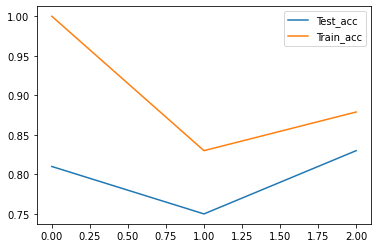

In [94]:
plot_3_df.plot.line()

### Decision Test Accuracy for Scaled Data

In [101]:
Scaled_DT = DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
DT_Scaled_Test_Accuracy = accuracy_score(y_test,y_pred)
DT_Scaled_Test_accuracy

0.74

### Decision Train Accuracy for Scaled Data

In [96]:
y_pred_2 = DT.predict(x_train)
DT_Scaled_Train_accuracy = accuracy_score(y_train,y_pred_2)
DT_Scaled_Train_accuracy

1.0

### SVC Test Accuracy for Scaled Data

In [97]:
Scaled_SVC = SVC.fit(x_train,y_train)
y_pred = SVC.predict(x_test)
SVC_Scaled_Test_accuracy = accuracy_score(y_test,y_pred)
SVC_Scaled_Test_accuracy

0.86

### SVC Train Accuracy for Scaled Data

In [98]:
y_pred_2 = SVC.predict(x_train)
SVC_Scaled_Train_accuracy = accuracy_score(y_train,y_pred_2)
SVC_Scaled_Train_accuracy

0.9133333333333333

### Perceptron Test Accuracy for Scaled Data

In [99]:
Scaled_per = Per.fit(x_train,y_train)
y_pred = Per.predict(x_test)
Per_Scaled_Test_accuracy = accuracy_score(y_test,y_pred)
Per_Scaled_Test_accuracy

0.86

### Perceptron Train Accuracy for Scaled Data

In [100]:
y_pred_2 = Per.predict(x_train)
Per_Scaled_Train_accuracy = accuracy_score(y_train,y_pred_2)
Per_Scaled_Train_accuracy

0.91

Using accuracy score metric from sklearn we have calculated training and testing accuracy for scaled dataset for all the three models.

In [102]:
plot_4 = {'models' : ['DT_Scaled', 'SVC_Scaled', 'Per_Scaled'], 
          'Test_acc' : [DT_Scaled_Test_accuracy, SVC_Scaled_Test_accuracy, Per_Scaled_Test_accuracy],
         'Train_acc' : [DT_Scaled_Train_accuracy, SVC_Scaled_Train_accuracy, Per_Scaled_Train_accuracy]}
plot_4_df = pd.DataFrame(plot_4)
plot_4_df

,models,Test_acc,Train_acc
0,DT_Scaled,0.74,1.000000
1,SVC_Scaled,0.86,0.913333
2,Per_Scaled,0.86,0.910000


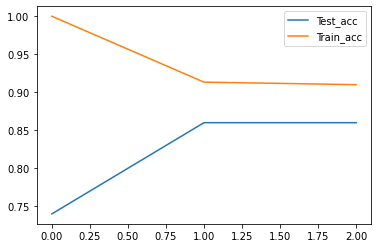

In [103]:
plot_4_df.plot.line()

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state= 590)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=590)

using train test split we have split the data in 15% testing and 85% training

### Decision Trees Test Accuracy for Original Data

In [105]:
Original_DT = DT.fit(X_train,Y_train)
Y_pred = DT.predict(X_test)
DT_Original_Test_Accuracy = accuracy_score(Y_test,Y_pred)
DT_Original_Test_Accuracy

0.82

### Decision Trees Train Accuracy for Original Data

In [106]:
Y_pred_2 = DT.predict(X_train)
DT_Original_Train_Accuracy = accuracy_score(Y_train,Y_pred_2)
DT_Original_Train_Accuracy

1.0

### SVC Test Accuracy for Original Data

In [107]:
Original_SVC = SVC.fit(X_train,Y_train)
Y_pred = SVC.predict(X_test)
SVC_Original_Test_Accuracy = accuracy_score(Y_test,Y_pred)
SVC_Original_Test_Accuracy

C:\Users\saisa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7933333333333333

### SVC Train Accuracy for Original Data

In [108]:
Y_pred_2 = SVC.predict(X_train)
SVC_Original_Train_Accuracy = accuracy_score(Y_train,Y_pred_2)
SVC_Original_Train_Accuracy

0.8294117647058824

### Perceptron Test Accuracy for Original Data

In [109]:
Original_per = Per.fit(X_train,Y_train)
Y_pred = Per.predict(X_test)
Per_Original_Test_Accuracy = accuracy_score(Y_test,Y_pred)
Per_Original_Test_Accuracy

0.8

### Perceptron Train Accuracy for Original Data

In [110]:
Y_pred_2 = Per.predict(X_train)
Per_Original_Train_Accuracy = accuracy_score(Y_train,Y_pred_2)
Per_Original_Train_Accuracy

0.8447058823529412

Using accuracy score metric from sklearn we have calculated training and testing accuracy for original dataset for all the three models.

In [111]:
plot_5 = {'models' : ['DT_Original', 'SVC_Original', 'Per_Original'], 
          'Test_acc' : [DT_Original_Test_Accuracy, SVC_Original_Test_Accuracy, Per_Original_Test_Accuracy],
         'Train_acc' : [DT_Original_Train_Accuracy, SVC_Original_Train_Accuracy, Per_Original_Train_Accuracy]}
plot_5_df = pd.DataFrame(plot_5)
plot_5_df

,models,Test_acc,Train_acc
0,DT_Original,0.820000,1.000000
1,SVC_Original,0.793333,0.829412
2,Per_Original,0.800000,0.844706


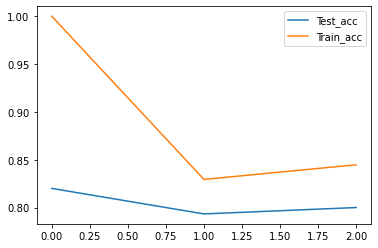

In [112]:
plot_5_df.plot.line()

### Decision Trees Test Accuracy for Scaled Data

In [141]:
Scaled_DT = DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
DT_Scaled_Test_Accuracy = accuracy_score(y_test,y_pred)
DT_Scaled_Test_accuracy

0.74

### DT Train Accuracy for Scaled Data

In [142]:
y_pred_2 = DT.predict(x_train)
DT_Scaled_Train_accuracy = accuracy_score(y_train,y_pred_2)
DT_Scaled_Train_accuracy

1.0

### SVC Test Accuracy for Scaled Data

In [143]:
Scaled_SVC = SVC.fit(x_train,y_train)
y_pred = SVC.predict(x_test)
SVC_Scaled_Test_accuracy = accuracy_score(y_test,y_pred)
SVC_Scaled_Test_accuracy

0.88

### SVC Train Accuracy for Scaled Data

In [144]:
y_pred_2 = SVC.predict(x_train)
SVC_Scaled_Train_accuracy = accuracy_score(y_train,y_pred_2)
SVC_Scaled_Train_accuracy

0.91875

### Perceptron Test Accuracy for Scaled Data

In [145]:
Scaled_per = Per.fit(x_train,y_train)
y_pred = Per.predict(x_test)
Per_Scaled_Test_accuracy = accuracy_score(y_test,y_pred)
Per_Scaled_Test_accuracy

0.87

### Perceptron Train Accuracy for Scaled Data

In [146]:
y_pred_2 = Per.predict(x_train)
Per_Scaled_Train_accuracy = accuracy_score(y_train,y_pred_2)
Per_Scaled_Train_accuracy

0.91

Using accuracy score metric from sklearn we have calculated training and testing accuracy for scaled dataset for all the three models.

In [147]:
plot_6 = {'models' : ['DT_Scaled', 'SVC_Scaled', 'Per_Scaled'], 
          'Test_acc' : [DT_Scaled_Test_accuracy, SVC_Scaled_Test_accuracy, Per_Scaled_Test_accuracy],
         'Train_acc' : [DT_Scaled_Train_accuracy, SVC_Scaled_Train_accuracy, Per_Scaled_Train_accuracy]}
plot_6_df = pd.DataFrame(plot_6)
plot_6_df

,models,Test_acc,Train_acc
0,DT_Scaled,0.74,1.00000
1,SVC_Scaled,0.88,0.91875
2,Per_Scaled,0.87,0.91000


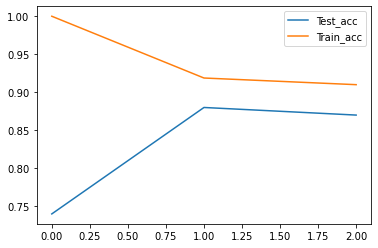

In [148]:
plot_6_df.plot.line()

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state= 590)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=590)

using train test split we have split the data in 20% testing and 80% training

### DT Test Accuracy for Original Data

In [122]:
Original_DT = DT.fit(X_train,Y_train)
Y_pred = DT.predict(X_test)
DT_Original_Test_Accuracy = accuracy_score(Y_test,Y_pred)
DT_Original_Test_Accuracy

0.84

### DT Train Accuracy for Original Data

In [123]:
Y_pred_2 = DT.predict(X_train)
DT_Original_Train_Accuracy = accuracy_score(Y_train,Y_pred_2)
DT_Original_Train_Accuracy

1.0

### SVC Test Accuracy for Original Data

In [124]:
Original_SVC = SVC.fit(X_train,Y_train)
Y_pred = SVC.predict(X_test)
SVC_Original_Test_Accuracy = accuracy_score(Y_test,Y_pred)
SVC_Original_Test_Accuracy

C:\Users\saisa\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.815

### SVC Train accuracy for Original Data

In [125]:
Y_pred_2 = SVC.predict(X_train)
SVC_Original_Train_Accuracy = accuracy_score(Y_train,Y_pred_2)
SVC_Original_Train_Accuracy

0.87

### Perceptron Test Accuracy for Original Data

In [126]:
Original_per = Per.fit(X_train,Y_train)
Y_pred = Per.predict(X_test)
Per_Original_Test_Accuracy = accuracy_score(Y_test,Y_pred)
Per_Original_Test_Accuracy

0.84

### Perceptron Train Accuracy for Original Data

In [127]:
Y_pred_2 = Per.predict(X_train)
Per_Original_Train_Accuracy = accuracy_score(Y_train,Y_pred_2)
Per_Original_Train_Accuracy

0.8725

Using accuracy score metric from sklearn we have calculated training and testing accuracy for original dataset for all the three models.

In [128]:
plot_7 = {'models' : ['DT_Original', 'SVC_Original', 'Per_Original'], 
          'Test_acc' : [DT_Original_Test_Accuracy, SVC_Original_Test_Accuracy, Per_Original_Test_Accuracy],
         'Train_acc' : [DT_Original_Train_Accuracy, SVC_Original_Train_Accuracy, Per_Original_Train_Accuracy]}
plot_7_df = pd.DataFrame(plot_7)
plot_7_df

,models,Test_acc,Train_acc
0,DT_Original,0.840,1.0000
1,SVC_Original,0.815,0.8700
2,Per_Original,0.840,0.8725


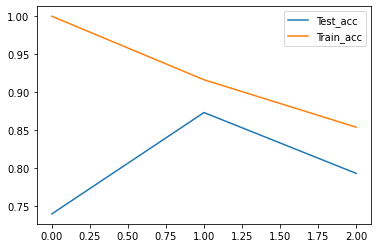

In [129]:
plot_6_df.plot.line()

### DT Test Accuracy for Scaled Data

In [133]:
Scaled_DT = DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
DT_Scaled_Test_Accuracy = accuracy_score(y_test,y_pred)
DT_Scaled_Test_accuracy

0.74

### DT Train Accuracy for Scaled Data

In [134]:
y_pred_2 = DT.predict(x_train)
DT_Scaled_Train_accuracy = accuracy_score(y_train,y_pred_2)
DT_Scaled_Train_accuracy

1.0

### SVC Test Accuracy for Scaled Data

In [135]:
Scaled_SVC = SVC.fit(x_train,y_train)
y_pred = SVC.predict(x_test)
SVC_Scaled_Test_accuracy = accuracy_score(y_test,y_pred)
SVC_Scaled_Test_accuracy

0.88

### SVC Train Accuracy for Scaled Data

In [136]:
y_pred_2 = SVC.predict(x_train)
SVC_Scaled_Train_accuracy = accuracy_score(y_train,y_pred_2)
SVC_Scaled_Train_accuracy

0.91875

### Perceptron Test Accuracy for Scaled Data

In [137]:
Scaled_per = Per.fit(x_train,y_train)
y_pred = Per.predict(x_test)
Per_Scaled_Test_accuracy = accuracy_score(y_test,y_pred)
Per_Scaled_Test_accuracy

0.87

### Perceptron Train Accuracy for Scaled Data

In [138]:
y_pred_2 = Per.predict(x_train)
Per_Scaled_Train_accuracy = accuracy_score(y_train,y_pred_2)
Per_Scaled_Train_accuracy

0.91

Using accuracy score metric from sklearn we have calculated training and testing accuracy for scaled dataset for all the three models.

In [139]:
plot_8 = {'models' : ['DT_Scaled', 'SVC_Scaled', 'Per_Scaled'], 
          'Test_acc' : [DT_Scaled_Test_accuracy, SVC_Scaled_Test_accuracy, Per_Scaled_Test_accuracy],
         'Train_acc' : [DT_Scaled_Train_accuracy, SVC_Scaled_Train_accuracy, Per_Scaled_Train_accuracy]}
plot_8_df = pd.DataFrame(plot_8)
plot_8_df

,models,Test_acc,Train_acc
0,DT_Scaled,0.74,1.00000
1,SVC_Scaled,0.88,0.91875
2,Per_Scaled,0.87,0.91000


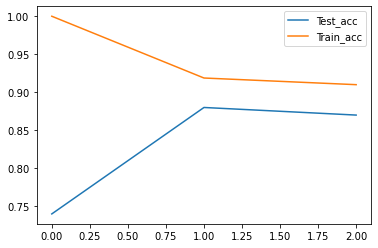

In [140]:
plot_8_df.plot.line()

8- Explain why certain models achieved better accuracy for training or testing than the other models in a clear non-Pythonnic language (plain English).

Change in accuracy for different models can be because of inputting more training data which in turn leads to overfitting. This haapened with Decision Tree classifier. Overall Decision tree Classifer accuracy is low it can be because of large tree depth. And overall Perceptron has better accuracies compared to both. It is because Perceptron tries to derive significance of the features in the data. Finally SVC has mediocre accuracies because it depends more on training data which leads to generalization.

9- Any improvement in the accuracy of the testing data because of the scaling? Explain your findings.



Yes, after scaling there is significant improvement in test accuracies when compared to accuraties of original data. Genrally, Machine Learning models compute the distance between 2 data points using euclidean distance. So, the algorithm favours the feature with beigger range, when the magnitude of one feature is high compare to other.